# Taller 1

El número de vendedores que emplea una comerciante de coches varía de cuatro, el valor más bajo, a
ocho, el más alto. ¿Depende el número de nuevos coches vendidos y, del número de vendedores x? Para
calcular esta cuestión, el gerente de ventas examinó los registros de las ventas para los últimos cuatro
meses y localizó un período de ocho semanas durante el cual no se utilizaron programas de estímulos
especiales. El número de coches vendidos semanalmente y, y el número de vendedores x, se muestran
en la siguiente tabla.


In [48]:
%matplotlib inline
import pandas as pd

import statsmodels.formula.api as smf
import ipystata
import plotly.graph_objects as go

In [58]:
from sklearn import datasets, linear_model
import sympy

In [45]:
datos={"Vendedores":[5,6,5,4,7,6,5,8],"Coches_vendidos":[10,20,18,10,21,15,13,22]}

In [46]:
df=pd.DataFrame(datos,)
df.index.names = ['Semana']
df

,Vendedores,Coches_vendidos
Semana,,
0,5,10
1,6,20
2,5,18
3,4,10
4,7,21
5,6,15
6,5,13
7,8,22


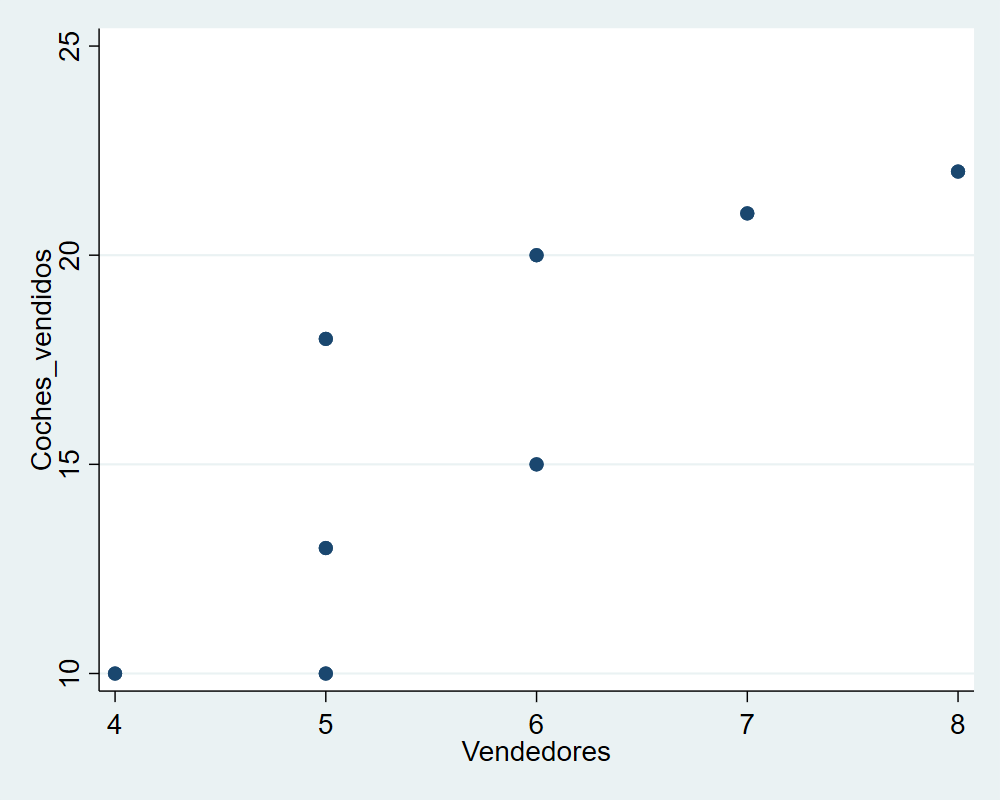

In [47]:
%%stata -o life_df  -d df
scatter Coches_vendidos Vendedores

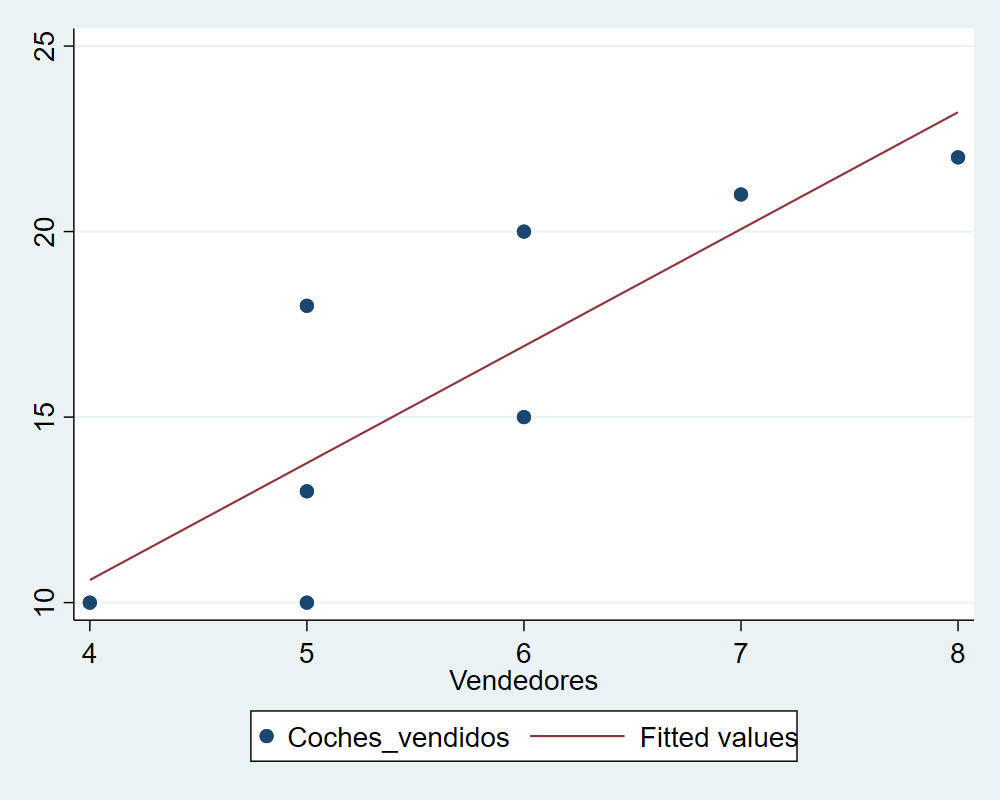

In [52]:
%%stata -o life_df  -d df
two scatter Coches_vendidos Vendedores || lfit Coches_vendidos Vendedores

In [113]:
%%stata -o life_df  -d df
regress Coches_vendidos Vendedores


      Source |       SS           df       MS      Number of obs   =         8
-------------+----------------------------------   F(1, 6)         =     14.10
       Model |  114.266304         1  114.266304   Prob > F        =    0.0094
    Residual |  48.6086957         6  8.10144928   R-squared       =    0.7016
-------------+----------------------------------   Adj R-squared   =    0.6518
       Total |     162.875         7  23.2678571   Root MSE        =    2.8463

------------------------------------------------------------------------------
Coches_ven~s |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
  Vendedores |   3.152174   .8393294     3.76   0.009     1.098409    5.205939
       _cons |         -2   4.929944    -0.41   0.699    -14.06314    10.06314
------------------------------------------------------------------------------



In [110]:
from sympy import *
X,Y = symbols('X Y')
beta1,beta2 = symbols(r'\beta_1 \beta_2')

In [118]:
eq2 = Eq(Y, beta1 + beta2*X)

r=eq2.subs(beta2, 3.152)
r=eq2.subs(beta1, -2).subs(beta2, 3.152)
r

Eq(Y, 3.152*X - 2)